# Module: Capstone Project

## Section: Computer vision

## <font color='#4073FF'> Project Solution: Garbage classification</font>

###  <font color='#14AAF5'>Classify garbage into one of the given classes</font>

### Project Brief:


Waste segregation is included in law because it is much easier to recycle. Effective segregation of wastes means that less waste goes to landfill which makes it cheaper and better for people and the environment. It is also important to segregate for public health. In this project, you are required to segregate waste into one of the given categories using computer vision techniques. 




### 1. Dataset

The Garbage Classification Dataset contains 6 classifications: 

- cardboard (393) 
- glass (491)
- metal (400)
- paper(584)
- plastic (472) 
- trash(127)

In [ ]:
# Getting the contents of the drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, Input
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

### 2. Data collection and exploration

In [ ]:
# Defining an image data generator
data = ImageDataGenerator(
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip = True,
        rescale=1./255, 
        validation_split=0.1,
        )

    
# Define batch size
batch_size=16 

# Get pre-processed train images from directory
traindata = data.flow_from_directory(directory="drive/MyDrive/Garbage classification",
                                     target_size = (224,224),
                                     batch_size = batch_size,
                                     class_mode = 'categorical',
                                     subset  = 'training',
                                     shuffle = True
                                     )

# Get pre-processed validation images from directory
validationdata = data.flow_from_directory(directory="drive/MyDrive/Garbage classification",
                                     target_size = (224,224),
                                     batch_size = batch_size,                                     
                                     class_mode = 'categorical',
                                     subset  = 'validation',
                                     shuffle = True
                                     )

Found 2285 images belonging to 6 classes.
Found 252 images belonging to 6 classes.


In [ ]:
# Viewing class labels

traindata.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

###3. Data visualization

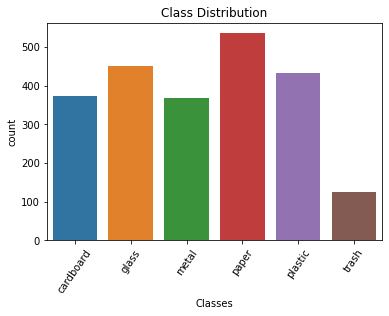

In [ ]:
# Class distribution
# 3 Classes

import seaborn as sns
sns.countplot(x=traindata.classes)
plt.title("Class Distribution")
plt.xlabel("Classes")

labels=['cardboard','glass','metal','paper','plastic','trash']

plt.xticks(range(0,6), labels, rotation=55)
plt.show()

###4. Modelling

#### **Methodology – Transfer Learning** 

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

That means, taking the relevant parts of a pre-trained machine learning model and applying it to a new but similar problem. This will usually be the core information for the model to function, with new aspects added to the model to solve a specific task.The main benefits of transfer learning include the saving of resources and improved efficiency when training new models. It can also help with training models when only unlabelled datasets are available, as the bulk of the model will be pre-trained.

**CREATING THE MODEL**

Three different models were tested, all with 'imagenet' weights and fine-tuning (training only the new layers added).

In [ ]:
#Inception Resnet

V = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Setting trainable false
for layer in V.layers:
    layer.trainable = False

# Adding some custom layers
x = Conv2D(128, (3, 3), activation='relu')(V.output)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(traindata.num_classes,activation='softmax')(x)

model = Model(inputs=V.input, outputs=x)


**CHECKPOINTS**

In [ ]:
#checkpoints to check performance during training and save model weights/data.
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
checkpointer = ModelCheckpoint(filepath="garbage_classification_weights.h5", verbose=1, monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=False)
csv_logger = CSVLogger("Log.csv", append=True, separator=',')

**TRAINING THE MODEL**

In [ ]:
#compiling the model
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy', metrics=['accuracy'])

stepsTrain = (traindata.n // batch_size) 
stepsVal = (validationdata.n // batch_size) 


In [ ]:
#model training for 50 epochs

history = model.fit(traindata, epochs = 50, callbacks=[earlystopping, checkpointer, csv_logger], validation_data=validationdata,
          steps_per_epoch=stepsTrain, validation_steps=stepsVal)


Epoch 1/50
142/142 [==============================] - ETA: 0s - loss: 1.5419 - accuracy: 0.6104
Epoch 1: val_accuracy improved from -inf to 0.75000, saving model to garbage_classification_weights.h5
142/142 [==============================] - 675s 5s/step - loss: 1.5419 - accuracy: 0.6104 - val_loss: 0.7424 - val_accuracy: 0.7500
Epoch 2/50
142/142 [==============================] - ETA: 0s - loss: 0.7622 - accuracy: 0.7250
Epoch 2: val_accuracy did not improve from 0.75000
142/142 [==============================] - 642s 5s/step - loss: 0.7622 - accuracy: 0.7250 - val_loss: 0.7308 - val_accuracy: 0.7208
Epoch 3/50
142/142 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.7488
Epoch 3: val_accuracy did not improve from 0.75000
142/142 [==============================] - 637s 4s/step - loss: 0.6958 - accuracy: 0.7488 - val_loss: 0.7193 - val_accuracy: 0.7500
Epoch 4/50
142/142 [==============================] - ETA: 0s - loss: 0.6381 - accuracy: 0.7770
Epoch 4: val_ac

### 5. Save the model

In [ ]:
# Saving the model
model.save('resv')

INFO:tensorflow:Assets written to: resv/assets


In [ ]:
# Downloading zip
!zip -r resv.zip resv/

  adding: resv/ (stored 0%)
  adding: resv/assets/ (stored 0%)
  adding: resv/variables/ (stored 0%)
  adding: resv/variables/variables.index (deflated 80%)
  adding: resv/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: resv/saved_model.pb (deflated 92%)
  adding: resv/keras_metadata.pb (deflated 96%)


In [ ]:
import pandas as pd

# Load model
model = tf.keras.models.load_model("resv") 

# Get logs
log = pd.read_csv("Log.csv") 

In [ ]:
log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.610401,1.541945,0.750000,0.742394
1,1,0.724989,0.762156,0.720833,0.730759
2,2,0.748788,0.695804,0.750000,0.719259
3,3,0.776994,0.638075,0.741667,0.713800
4,4,0.782283,0.602460,0.766667,0.590641
5,5,0.805201,0.552254,0.787500,0.634911
6,6,0.828559,0.482595,0.762500,0.782999
7,7,0.840899,0.453225,0.758333,0.694750
8,8,0.805641,0.521567,0.766667,0.704705
9,9,0.832966,0.466489,0.787500,0.591131


### Model Evaluation on test images from google



In [ ]:
# Getting class indices
validationdata.class_indices.keys()

dict_keys(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'])

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

def predict_test(img_path):

      #load the image
      my_image = load_img(img_path, target_size=(224, 224))

      #preprocess the image
      my_image = img_to_array(my_image)
      my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
      my_image = tf.keras.applications.vgg16.preprocess_input(my_image)
      my_image = my_image/255.0

      #make the prediction
      labels = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Trash']
      prediction = np.argmax(model.predict(my_image))
      return labels[prediction]

p1 = predict_test('drive/MyDrive/waste_test/t1.jpg')
print(p1)

p2 = predict_test('drive/MyDrive/waste_test/t2.jpg')
print(p2)

p3 = predict_test('drive/MyDrive/waste_test/t3.jpg')
print(p3)

p4 = predict_test('drive/MyDrive/waste_test/t4.jpg')
print(p4)

p5 = predict_test('drive/MyDrive/waste_test/t5.jpg')
print(p5)

p6 = predict_test('drive/MyDrive/waste_test/t6.jpg')
print(p6)

Glass
Cardboard
Metal
Paper
Trash
Trash
